In [50]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

In [51]:
seq = np.array([.1, .2 , .3, .4, .5, .6, .7, .8, .9])
print(seq)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [52]:
time_steps = len(seq)
print(time_steps)

samples = 1 # batch_size
features = 1 # n_input
hidden_layer = 100
epochs = 300

9


In [53]:
seq = seq.reshape(samples, time_steps, features)
print(seq)

[[[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


In [54]:
model = Sequential()
model.add(LSTM(hidden_layer, activation='relu', input_shape=(time_steps, features)))
model.add(RepeatVector(time_steps))
model.add(LSTM(hidden_layer, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

In [55]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(seq, seq, epochs=epochs, verbose=0)

result = model.evaluate(seq, seq)
print("\nTraining accuracy:", result[1])

1/1 [==============================] - 0s 485ms/step

Training accuracy: 0.0


In [56]:
yhat = model.predict(seq, verbose=0)
print(yhat)

[[[0.10459806]
  [0.20002319]
  [0.2984058 ]
  [0.39874393]
  [0.50036997]
  [0.60088265]
  [0.7004344 ]
  [0.7997957 ]
  [0.8997754 ]]]


In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100)               40800     
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 9, 100)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 9, 100)            80400     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 9, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


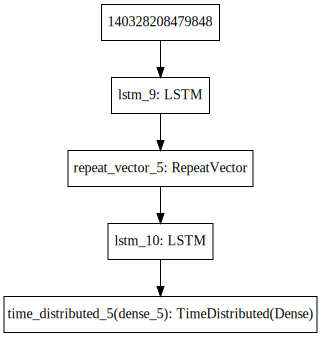

In [58]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

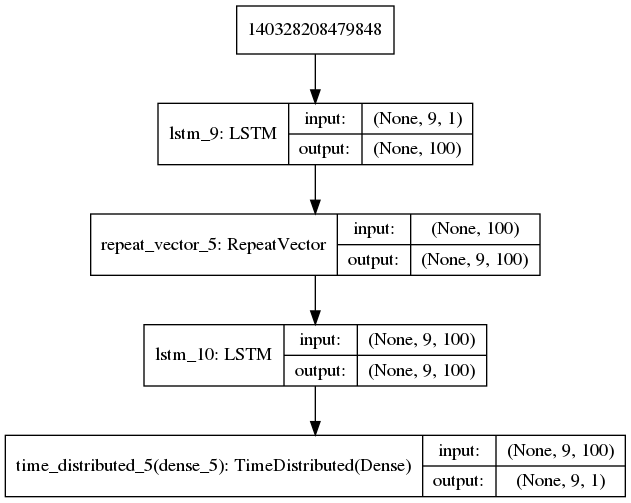

In [59]:
from keras.utils import plot_model
from IPython.display import Image
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
Image(retina=True, filename='reconstruct_lstm_autoencoder.png')